# 1) Setup

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats

from copy import copy
import time
import yaml
import networkx as nx
import re

import sklearn
from sklearn.cluster import AgglomerativeClustering     #cluster edges
from sklearn.metrics import silhouette_score            #score for clustering
from sklearn.metrics import classification_report       #score for classification
from sklearn.model_selection import GridSearchCV        #cross validate for KDE
from sklearn.model_selection import cross_validate      #cross validate for classification
from sklearn.neighbors import KernelDensity             #KDE for visualisation

#classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

#visualise decision trees
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#Pytorch libraries
import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

import pymongo
from pymongo import MongoClient
from datetime import datetime
from datetime import timedelta
print("done")

done


In [367]:
#import functions from python files

#1) draw maps
from draw_graph import *
from draw_graph_tsc import *

#2) Bayesian optimisation of Lognormal model
from Gamma import *
from Lognormal import *
from Gaussian import *
from Gaussian_broadcast import *
from Normal_Gamma import *

from Normal_Gamma_bayes import *
from Normal_Gamma_bayes_update import *
from Gaussian_ml import *              # for comparison

from select_data import *
from select_data_edge import *

from kde import *

#3) Clustering
from get_context import *
from get_adjacent import *
from get_coords import *

from distances_length import *
from distances_length_subset import *
from distances_connections import *
from distances_connections2 import *
from distances_ks import *
from distances_square import *
from distances_angle_max import *
from distances_class import *

from underscore_prefix import *
from underscore_suffix import *

from integrate import *
from integrate_trapezium import *
from integrate_simpson import *
from integrate_pdf import *

from calc_length import *
from calc_angle import *

from optimum_clusters import *
from optimum_clusters_DBSCAN import *
from optimum_clusters_SC import *
from draw_clusters import *
from draw_clusters_tsc import *

from error_ks_2samples import *
from error_square_2samples import *
from compare_edges import *

#4) Classification
from get_length import *
from get_connections import *
from get_angle_max import *
from get_angle_sum import *

from dataloader6 import *
from dataloader_random import *
from classifier_pointtest import *
from classifier_featureimportance import *
from classifier_comparemethods import *
from classifier_trainonboth import *

#5) Evaluation
from get_lognorm_fit import *
from evaluate_maxedge import *
from evaluate_maxedge_fast import *
from evaluate_alledge import *

print("done")

done


In [359]:
#AAF
# retrieve data
df_aaf_y4 = pd.read_excel("data_aaf_y4.xlsx")
df_aaf_y4 = df_aaf_y4[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y3 = pd.read_excel("data_aaf_y3.xlsx")
df_aaf_y3 = df_aaf_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y2 = pd.read_excel("data_aaf_y2.xlsx")
df_aaf_y2 = df_aaf_y2[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_aaf_merge = pd.concat([df_aaf_y4, df_aaf_y3, df_aaf_y2])
df_aaf_merge = df_aaf_merge.sample(frac=1).reset_index(drop = True)

#TSC
# retrieve data
df_tsc_bob = pd.read_excel("data_tsc_bob.xlsx")
df_tsc_bob = df_tsc_bob[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_betty = pd.read_excel("data_tsc_betty.xlsx")
df_tsc_betty = df_tsc_betty[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_y3 = pd.read_excel("data_tsc_y3.xlsx")
df_tsc_y3 = df_tsc_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_tsc_merge = pd.concat([df_tsc_betty, df_tsc_bob, df_tsc_y3])
df_tsc_merge = df_tsc_merge.sample(frac=1).reset_index(drop = True)

#LABS
# retrieve data
df_labs = pd.read_excel("data_labs.xlsx")
df_labs = df_labs[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#randomise data
df_labs_merge = df_labs.sample(frac=1).reset_index(drop = True)

#BLENHEIM
# retrieve data
df_blenheim_random = pd.read_excel("data_blenheim_random.xlsx")
df_blenheim_random = df_blenheim_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_blenheim_targeted = pd.read_excel("data_blenheim_targeted.xlsx")
df_blenheim_targeted = df_blenheim_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_blenheim_merge = pd.concat([df_blenheim_random,df_blenheim_targeted])
df_blenheim_merge = df_blenheim_merge.sample(frac=1).reset_index(drop = True)

#WALMART
# retrieve data
df_walmart_random = pd.read_excel("data_walmart_random.xlsx")
df_walmart_random = df_walmart_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_walmart_targeted = pd.read_excel("data_walmart_targeted.xlsx")
df_walmart_targeted = df_walmart_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_walmart_merge = pd.concat([df_walmart_random,df_walmart_targeted])
df_walmart_merge = df_walmart_merge.sample(frac=1).reset_index(drop = True)

print("done")

done


# 2) Pipeline [Train on TSC, Test on AAF]

## 2a) Clustering on Map A (TSC)

In [4]:
ks_matrix_tsc, ks_edges_tsc = distances_ks(df_tsc_merge, metric = "difference", cutoff = 20)

0 edges: 0.05424928665161133 secs
10 edges: 5.971698760986328 secs
20 edges: 10.756791591644287 secs
30 edges: 15.337690114974976 secs
40 edges: 19.564846515655518 secs
50 edges: 23.610990047454834 secs
60 edges: 27.348973274230957 secs
70 edges: 31.011517763137817 secs
80 edges: 34.67143487930298 secs
90 edges: 38.38448357582092 secs
100 edges: 42.00049710273743 secs
110 edges: 45.51413607597351 secs
120 edges: 49.073296308517456 secs
130 edges: 52.51042866706848 secs
140 edges: 56.19209313392639 secs
150 edges: 59.61101293563843 secs
160 edges: 62.950756311416626 secs
170 edges: 66.33478903770447 secs
180 edges: 69.71449255943298 secs
190 edges: 73.41901421546936 secs
200 edges: 75.50115275382996 secs
210 edges: 75.50813245773315 secs
220 edges: 75.5151138305664 secs
230 edges: 75.52209520339966 secs
240 edges: 75.52907633781433 secs
Time taken: 75.53406310081482 secs


Optimum no. of clusters: 2
Max silhouette coeff: 0.25653094612328553


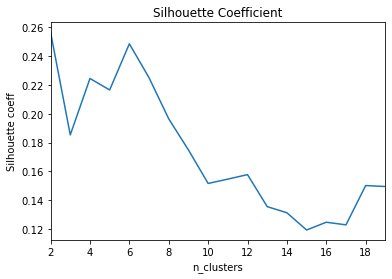

In [59]:
n_clusters, s_list = optimum_clusters(ks_matrix_tsc, max_clusters = 20, method = "ss", linkage = "average")

In [72]:
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( ks_matrix_tsc )
print(labels)
ks_clusters_tsc = pd.DataFrame(index = np.arange(len(ks_edges_tsc)),columns = ["edge_id", "cluster_id"])
ks_clusters_tsc["edge_id"] = ks_edges_tsc
ks_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[3 1 2 2 2 2 2 5 1 2 2 1 1 4 1 4 1 1 2 1 2 2 2 1 2 0 2 2 2 2 2 3 3 0 3 2 0
 1 0 3 0 0 2 0 2 1 2 2 0 0 2 2 1 2 0 1 1 4 4 4 0 3 0 4 1 0 0 2 4 0 0 2 4 4
 2 0 0 1 2 1 1 4 2 1 1 1 0 3 2 1 1 3 2 4 4 0 2 2 2 2 2 2 2 2 4 3 2 1 1 4 2
 1 1 1 0 2 2 0 1 1 5 2 2 0 1 2 1 1 1 1 1 1 2 3 3 0 0 1 1 1 2 2 1 2 1 2 0 2
 0 2 2 1 1 0 2 2 1 0 1 0 2 1 2 2 2 2 0 1 0 2 0 0 1 2 0 1 1 1 2 1 1 3 3 0 2
 2 2 4 2 3 0 1 2 2 2 2]
6 clusters


no. of edges: 249
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
Edges without enough data are black


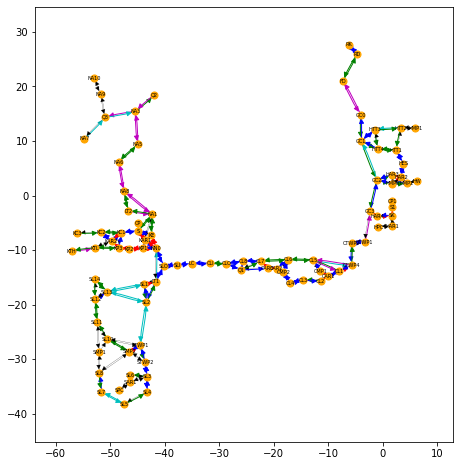

In [73]:
G = draw_clusters_tsc("tsc_map.yaml", ks_clusters_tsc, size = 2, rotate = False)
plt.savefig("clusters_ks_tsc.png", dpi = 1000, bbox_inches = "tight")

## 2b) Clustering on Map B (AAF)
- "ground truth"

In [8]:
ks_matrix_aaf, ks_edges_aaf = distances_ks(df_aaf_merge, metric = "difference", cutoff = 20)

0 edges: 0.04556465148925781 secs
10 edges: 13.969094276428223 secs
20 edges: 26.06306028366089 secs
30 edges: 36.35730457305908 secs
40 edges: 44.83270263671875 secs
50 edges: 53.09571647644043 secs
60 edges: 60.532803535461426 secs
70 edges: 67.73487377166748 secs
80 edges: 74.38569235801697 secs
90 edges: 81.03970193862915 secs
100 edges: 87.2996437549591 secs
110 edges: 93.06489419937134 secs
120 edges: 98.93913841247559 secs
130 edges: 104.52271008491516 secs
140 edges: 110.1201479434967 secs
150 edges: 116.1603090763092 secs
160 edges: 121.745778799057 secs
170 edges: 127.2741219997406 secs
180 edges: 130.17983961105347 secs
190 edges: 130.1908094882965 secs
200 edges: 130.2017800807953 secs
Time taken: 130.2127504348755 secs


Optimum no. of clusters: 7
Max silhouette coeff: 0.3215316159839251


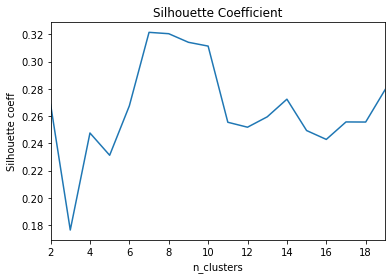

In [61]:
n_clusters, s_list = optimum_clusters(ks_matrix_aaf, max_clusters = 20, method = "ss", linkage = "average")

In [356]:
clustering = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( ks_matrix_aaf )
print(labels)
ks_clusters_aaf = pd.DataFrame(index = np.arange(len(ks_edges_aaf)),columns = ["edge_id", "cluster_id"])
ks_clusters_aaf["edge_id"] = ks_edges_aaf
ks_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[2 3 3 3 2 2 5 2 2 2 6 6 3 2 3 0 3 2 2 2 6 5 2 2 3 2 2 2 2 6 2 3 3 2 6 6 6
 2 6 2 1 1 2 2 1 2 1 6 6 5 2 2 5 2 3 6 6 1 4 6 2 2 2 2 2 4 2 6 1 4 2 2 0 1
 2 6 0 6 0 1 2 2 1 1 4 1 2 1 1 1 5 0 0 3 2 2 1 2 5 1 3 3 3 2 3 0 2 3 3 5 3
 3 2 2 3 2 5 6 1 3 5 3 5 6 6 2 1 2 2 5 6 1 5 4 6 5 6 5 3 3 5 2 2 1 2 1 3 3
 3 2 3 1 3 5 1 2 6 2 6 6 3 2 2 2 1 2 4 2 1 1 5 5 4 2 6]
7 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
CLuster 6 has colour code: orange
Edges without enough data are black


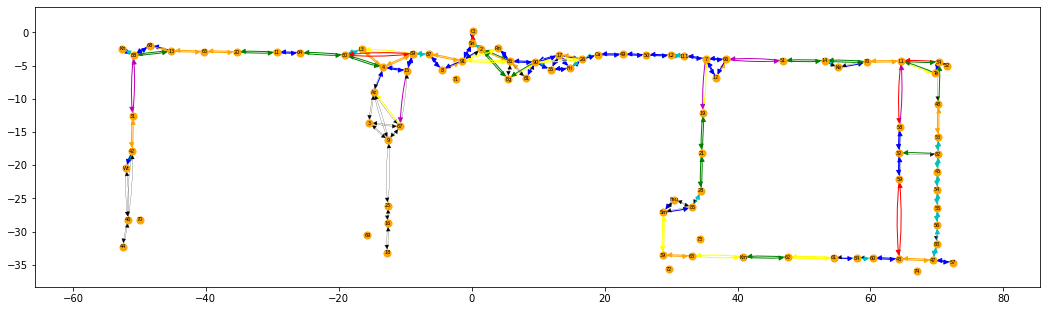

In [357]:
G = draw_clusters("aaf_map.yaml", ks_clusters_aaf, size = 3, rotate = True)
plt.savefig("clusters_ks_aaf.png", dpi = 1000, bbox_inches = "tight")

## 2c) Binary Classifier

In [207]:
df_class_diff_tsc = dataloader6(ks_clusters_tsc, filename = "tsc_map.yaml")
df_class_diff_aaf = dataloader6(ks_clusters_aaf, filename = "aaf_map.yaml")


Time taken (dataloader6): 22.109252452850342 secs
Time taken (dataloader6): 17.58702540397644 secs


In [208]:
#point test
clf = classifier_pointtest(df_class_diff_tsc, df_class_diff_aaf,classifier = "rf",balanced = True)

Samples drawn: 9952
Samples drawn: 6220
Classifier type: rf
Accuracy: 0.7556270096463023
              precision    recall  f1-score   support

         0.0       0.76      0.75      0.75      3110
         1.0       0.75      0.76      0.76      3110

    accuracy                           0.76      6220
   macro avg       0.76      0.76      0.76      6220
weighted avg       0.76      0.76      0.76      6220



Samples drawn: 15225
edge_length_diff           0.506137
max_angle_diff             0.192080
sum_angle_diff             0.183811
total_connections_diff     0.047197
origin_connections_diff    0.037959
target_connections_diff    0.032816
dtype: float64


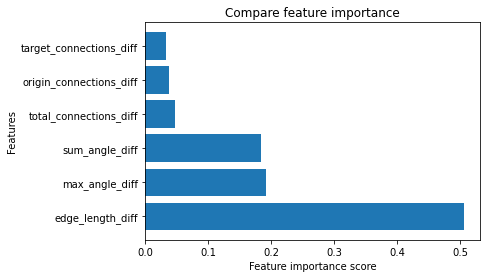

In [20]:
#feature importance
importance = classifier_featureimportance(df_class_diff_aaf, balanced = False)

Samples drawn: 9952
Samples drawn: 6220
1000 datapoints: 0.6338047981262207 secs
2000 datapoints: 1.4107320308685303 secs
3000 datapoints: 2.446298837661743 secs
4000 datapoints: 3.7278664112091064 secs
5000 datapoints: 5.399640321731567 secs
6000 datapoints: 7.543666839599609 secs
7000 datapoints: 10.119467973709106 secs
8000 datapoints: 13.442106008529663 secs
9000 datapoints: 17.172189712524414 secs
Time taken: 17.172189712524414 secs
0.7954983922829582


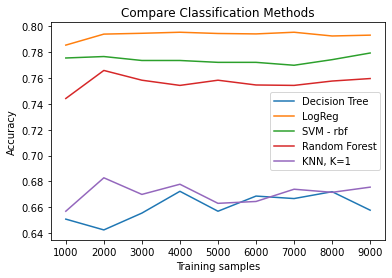

In [33]:
#Compare classification methods
df_class_diff_tsc = df_class_diff_tsc.sample(frac=1).reset_index(drop=True)
df_class_diff_aaf = df_class_diff_aaf.sample(frac=1).reset_index(drop=True)
df_train = df_class_diff_tsc
df_test = df_class_diff_aaf

accuracy = classifier_comparemethods(df_train,df_test,balanced = True, n_iter = 1, step_size = 1000)

Samples drawn: 9952
Samples drawn: 6220
1000 datapoints: 0.766218900680542 secs
2000 datapoints: 1.812645435333252 secs
3000 datapoints: 3.166351795196533 secs
4000 datapoints: 4.857487440109253 secs
5000 datapoints: 6.981159687042236 secs
6000 datapoints: 9.747181177139282 secs
Time taken: 9.747181177139282 secs
0.8909090909090909


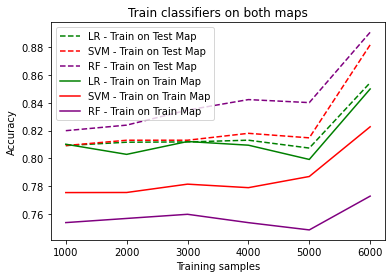

In [44]:
#Compare classification methods
df_class_diff_tsc = df_class_diff_tsc.sample(frac=1).reset_index(drop=True)
df_class_diff_aaf = df_class_diff_aaf.sample(frac=1).reset_index(drop=True)
df_train = df_class_diff_tsc
df_test = df_class_diff_aaf

accuracy = classifier_trainonboth(df_train,df_test,balanced = True, n_iter = 1, step_size = 1000)

In [84]:
df_test.tail()

,edge1,edge2,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff,class_pred,dist_pred,prob_pred
19105,KitchenPod2_KitchenPod1,SuppLocker4_SuppLocker3,0,0.305024,0,1,1,0.0712792,1.0475,0.24,0.76,0.24
19106,NewArea8_LearningTable2,SuppLocker3_SuppTransWP2,0,0.988411,1,1,2,1.07553,3.37923,0.42,0.58,0.42
19107,CorpLocker7_CorpLocker6,HospTriangularTable2_HospTriangularTable3,0,0.280833,1,1,2,0.539259,0.809327,0.34,0.66,0.34
19108,CorpLocker3_CorpLocker2,NewArea1_Station,0,0.737005,3,3,6,0.125553,3.63781,0.40,0.60,0.40
19109,SuppLocker5_SuppLocker7,SuppLocker14_SuppLocker12,0,1.12324,0,1,1,0.909423,1.93748,0.33,0.67,0.33


# 3) Classifier to Clusters (AAF)

In [209]:
dist_matrix_aaf, dist_edges_aaf = distances_class(df_class_diff_aaf,clf)

0 iterations: 0.19348597526550293 secs
5000 iterations: 16.560191869735718 secs
10000 iterations: 32.78155517578125 secs
15000 iterations: 51.768235206604004 secs
Time taken (distances_class): 52.43778204917908 secs


Optimum no. of clusters: 4
Max silhouette coeff: 0.30739140024110084


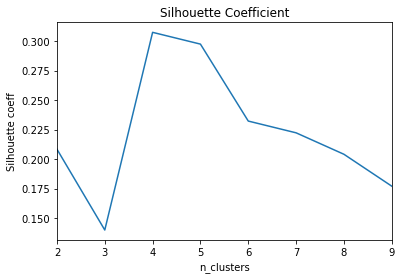

In [210]:
n_clusters, s_list = optimum_clusters(dist_matrix_aaf, max_clusters = 10, method = "ss", linkage = "average")

In [211]:
clustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( dist_matrix_aaf )
print(labels)
dist_clusters_aaf = pd.DataFrame(index = np.arange(len(dist_edges_aaf)),columns = ["edge_id", "cluster_id"])
dist_clusters_aaf["edge_id"] = dist_edges_aaf
dist_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[1 1 1 1 1 1 3 1 1 1 3 3 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
 1 3 1 3 3 1 1 3 1 3 3 3 3 1 1 3 1 1 1 3 3 2 3 1 1 1 1 1 2 1 3 3 2 1 1 0 3
 1 1 2 3 0 3 1 1 3 3 2 3 1 3 3 3 2 2 2 1 1 1 3 1 3 3 1 1 1 1 1 3 1 1 1 2 1
 1 1 1 1 1 2 1 3 1 3 1 3 3 3 1 3 1 1 2 3 3 3 2 3 3 3 3 1 1 2 1 1 3 3 3 1 1
 1 1 1 3 1 3 3 1 1 3 1 1 1 1 1 1 3 1 2 1 3 3 3 3 2 1]
4 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
Edges without enough data are black


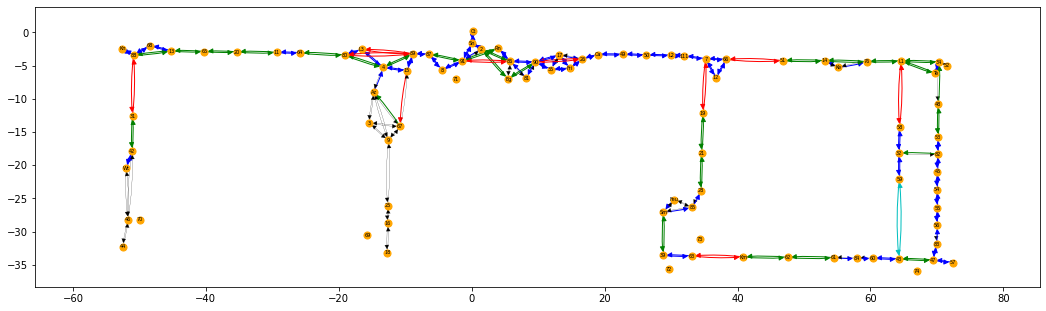

In [236]:
G = draw_clusters("aaf_map.yaml", dist_clusters_aaf, size = 3, rotate = True)
plt.savefig("clusters_dist_aaf.png", dpi = 1000, bbox_inches = "tight")

# 4) Other clustering methods (AAF)

## 4a) By Edge Length

In [212]:
context_aaf = get_context("aaf_map.yaml",suppress_message = False)
length_matrix_aaf,length_edges_aaf = distances_length_subset(context_aaf,dist_edges_aaf)

Time taken (get_context): 0.746056318283081 secs
Time taken (distances_length_subset):  1.7134456634521484 secs


Optimum no. of clusters: 4
Max silhouette coeff: 0.631597235562375


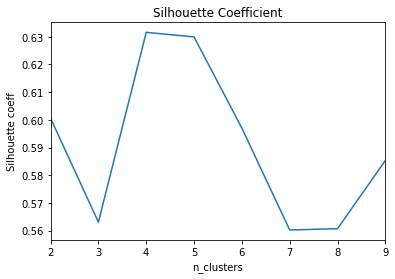

In [213]:
n_clusters, s_list = optimum_clusters(length_matrix_aaf, max_clusters = 10, method = "ss", linkage = "average")

In [214]:
clustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( length_matrix_aaf )
print(labels)
length_clusters_aaf = pd.DataFrame(index = np.arange(len(length_edges_aaf)),columns = ["edge_id", "cluster_id"])
length_clusters_aaf["edge_id"] = length_edges_aaf
length_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[3 3 3 3 1 1 3 3 3 3 3 3 3 1 0 0 1 1 1 3 3 3 3 0 3 1 1 3 3 3 3 1 3 3 1 3 3
 3 3 3 1 3 1 1 1 3 0 3 3 3 3 3 0 1 3 1 1 3 1 1 1 1 3 3 1 1 1 0 3 3 3 1 3 3
 3 1 3 3 1 1 1 3 1 3 2 3 3 1 3 3 1 1 3 3 3 3 1 0 1 3 3 3 3 3 3 3 3 0 3 2 3
 1 3 1 1 3 0 3 1 1 1 3 3 0 1 3 3 3 0 3 3 1 1 3 3 1 3 1 0 3 3 3 1 3 3 3 3 3
 1 3 1 3 3 1 3 3 0 1 0 3 1 3 0 3 3 1 3 1 3 3 3 1 1 1]
4 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
Edges without enough data are black


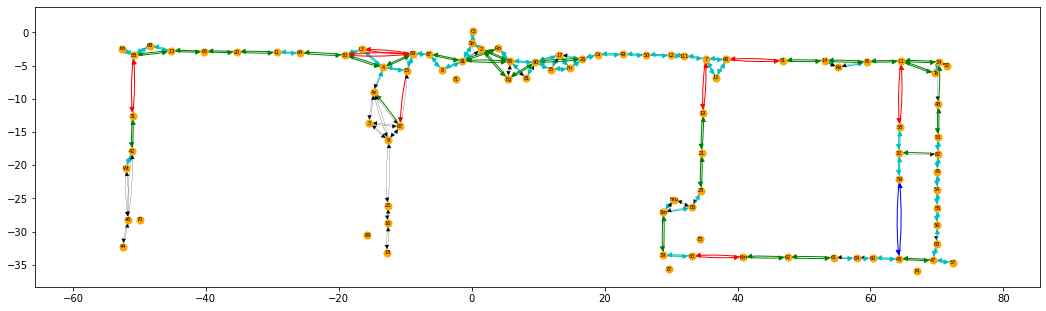

In [238]:
G = draw_clusters("aaf_map.yaml", length_clusters_aaf, size = 3, rotate = True)
plt.savefig("clusters_length_aaf.png", dpi = 1000, bbox_inches = "tight")

## 4b) By KS distance

In [239]:
ks_matrix_aaf, ks_edges_aaf = distances_ks(df_aaf_merge, metric = "difference", cutoff = 20)

0 edges: 0.04328727722167969 secs
10 edges: 16.544368982315063 secs
20 edges: 30.15208339691162 secs
30 edges: 41.28159999847412 secs
40 edges: 51.06191825866699 secs
50 edges: 60.72112727165222 secs
60 edges: 69.19400072097778 secs
70 edges: 77.09114837646484 secs
80 edges: 84.40265274047852 secs
90 edges: 91.3678207397461 secs
100 edges: 97.86232447624207 secs
110 edges: 103.81387305259705 secs
120 edges: 109.69537353515625 secs
130 edges: 115.92989540100098 secs
140 edges: 122.25071334838867 secs
150 edges: 128.2334644794464 secs
160 edges: 133.89326333999634 secs
170 edges: 139.69184756278992 secs
180 edges: 142.6515257358551 secs
190 edges: 142.66349387168884 secs
200 edges: 142.6755666732788 secs
Time taken: 142.68615889549255 secs


Optimum no. of clusters: 7
Max silhouette coeff: 0.3215316159839251


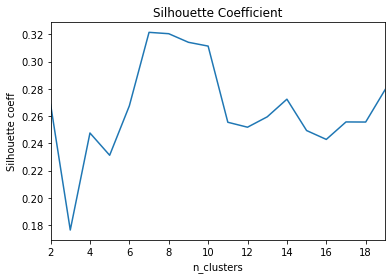

In [215]:
n_clusters, s_list = optimum_clusters(ks_matrix_aaf, max_clusters = 20, method = "ss", linkage = "average")

In [216]:
clustering = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage = "average")
labels = clustering.fit_predict( ks_matrix_aaf )
print(labels)
ks_clusters_aaf = pd.DataFrame(index = np.arange(len(ks_edges_aaf)),columns = ["edge_id", "cluster_id"])
ks_clusters_aaf["edge_id"] = ks_edges_aaf
ks_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[2 3 3 3 2 2 5 2 2 2 6 6 3 2 3 0 3 2 2 2 6 5 2 2 3 2 2 2 2 6 2 3 3 2 6 6 6
 2 6 2 1 1 2 2 1 2 1 6 6 5 2 2 5 2 3 6 6 1 4 6 2 2 2 2 2 4 2 6 1 4 2 2 0 1
 2 6 0 6 0 1 2 2 1 1 4 1 2 1 1 1 5 0 0 3 2 2 1 2 5 1 3 3 3 2 3 0 2 3 3 5 3
 3 2 2 3 2 5 6 1 3 5 3 5 6 6 2 1 2 2 5 6 1 5 4 6 5 6 5 3 3 5 2 2 1 2 1 3 3
 3 2 3 1 3 5 1 2 6 2 6 6 3 2 2 2 1 2 4 2 1 1 5 5 4 2 6]
7 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
CLuster 6 has colour code: orange
Edges without enough data are black


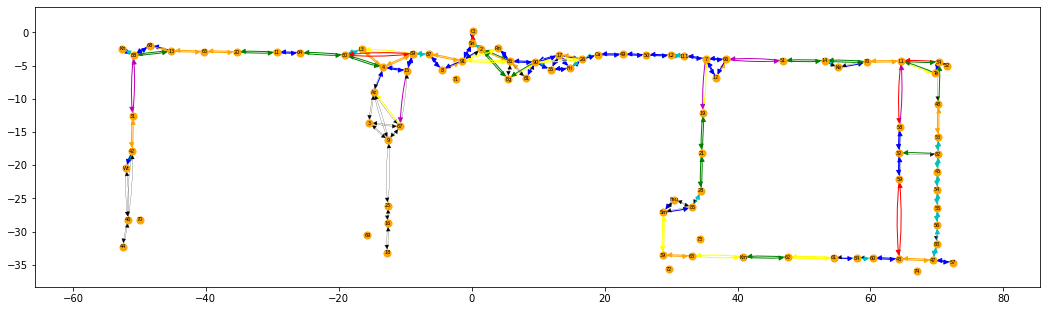

In [244]:
G = draw_clusters("aaf_map.yaml", ks_clusters_aaf, size = 3, rotate = True)
plt.savefig("clusters_ks_aaf.png", dpi = 1000, bbox_inches = "tight")

## 4c) Check Discrepancies

N_observations: 629 177
KS stat: 0.9355536992625726     p_val: 9.341630900644823e-165


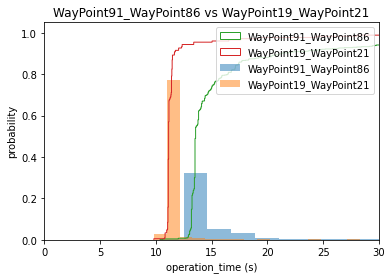

In [365]:
# 1) Select data of interest
origin = "WayPoint7"
target = "WayPoint19"
edge1 = origin + "_" + target

origin = "WayPoint19"
target = "WayPoint7"
edge2 = origin + "_" + target

ks,p_val = compare_edges(df_aaf_merge, edge1, edge2, metric = "difference")

# 5) Pipeline [Train on AAF, Test on TSC]

## 5a) Get KS clusters (AAF)

In [91]:
#train map
ks_matrix_aaf, ks_edges_aaf = distances_ks(df_aaf_merge, metric = "difference", cutoff = 20)

0 edges: 0.0329437255859375 secs
10 edges: 13.020402193069458 secs
20 edges: 24.167130708694458 secs
30 edges: 33.6362464427948 secs
40 edges: 41.66356897354126 secs
50 edges: 49.23575043678284 secs
60 edges: 56.15331697463989 secs
70 edges: 62.66867113113403 secs
80 edges: 68.97428917884827 secs
90 edges: 75.0248019695282 secs
100 edges: 80.85046792030334 secs
110 edges: 86.20038104057312 secs
120 edges: 91.50300288200378 secs
130 edges: 96.83314251899719 secs
140 edges: 102.03553175926208 secs
150 edges: 107.20772171020508 secs
160 edges: 112.39973592758179 secs
170 edges: 117.61185836791992 secs
180 edges: 120.15266060829163 secs
190 edges: 120.16163659095764 secs
200 edges: 120.17161011695862 secs
Time taken: 120.1805853843689 secs


Optimum no. of clusters: 7
Max silhouette coeff: 0.3215316159839251


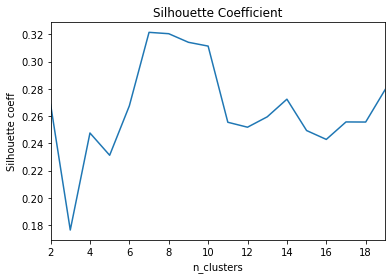

In [98]:
n_clusters, s_list = optimum_clusters(ks_matrix_aaf, max_clusters = 20, method = "ss", linkage = "average")

In [99]:
clustering = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( ks_matrix_aaf )
print(labels)
ks_clusters_aaf = pd.DataFrame(index = np.arange(len(ks_edges_aaf)),columns = ["edge_id", "cluster_id"])
ks_clusters_aaf["edge_id"] = ks_edges_aaf
ks_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[2 3 3 3 2 2 5 2 2 2 6 6 3 2 3 0 3 2 2 2 6 5 2 2 3 2 2 2 2 6 2 3 3 2 6 6 6
 2 6 2 1 1 2 2 1 2 1 6 6 5 2 2 5 2 3 6 6 1 4 6 2 2 2 2 2 4 2 6 1 4 2 2 0 1
 2 6 0 6 0 1 2 2 1 1 4 1 2 1 1 1 5 0 0 3 2 2 1 2 5 1 3 3 3 2 3 0 2 3 3 5 3
 3 2 2 3 2 5 6 1 3 5 3 5 6 6 2 1 2 2 5 6 1 5 4 6 5 6 5 3 3 5 2 2 1 2 1 3 3
 3 2 3 1 3 5 1 2 6 2 6 6 3 2 2 2 1 2 4 2 1 1 5 5 4 2 6]
7 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
CLuster 6 has colour code: orange
Edges without enough data are black


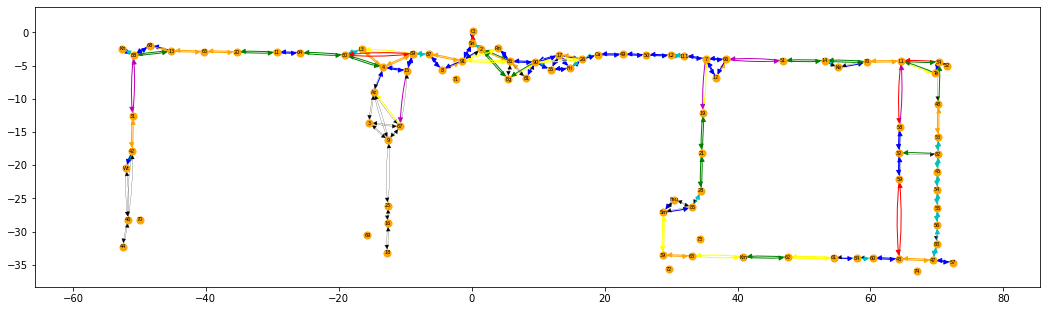

In [7]:
G = draw_clusters("aaf_map.yaml", ks_clusters_aaf, size = 3, rotate = True)
plt.savefig("clusters_ks_aaf.png", dpi = 1000, bbox_inches = "tight")

## 5b) Get KS clusters (TSC)

In [8]:
#test map
ks_matrix_tsc, ks_edges_tsc = distances_ks(df_tsc_merge, metric = "difference", cutoff = 20)

0 edges: 0.04793095588684082 secs
10 edges: 6.028280258178711 secs
20 edges: 10.835371494293213 secs
30 edges: 15.426987648010254 secs
40 edges: 19.559275150299072 secs
50 edges: 23.482792139053345 secs
60 edges: 27.32805609703064 secs
70 edges: 31.14000391960144 secs
80 edges: 34.776633739471436 secs
90 edges: 38.41470456123352 secs
100 edges: 42.020293951034546 secs
110 edges: 45.678529024124146 secs
120 edges: 49.1837899684906 secs
130 edges: 52.64183950424194 secs
140 edges: 56.056605100631714 secs
150 edges: 59.5340576171875 secs
160 edges: 62.94999623298645 secs
170 edges: 66.72773838043213 secs
180 edges: 70.08953380584717 secs
190 edges: 73.94230508804321 secs
200 edges: 76.39010167121887 secs
210 edges: 76.3980484008789 secs
220 edges: 76.4060275554657 secs
230 edges: 76.41301012039185 secs
240 edges: 76.42101907730103 secs
Time taken: 76.4279682636261 secs


Optimum no. of clusters: 2
Max silhouette coeff: 0.25653094612328553


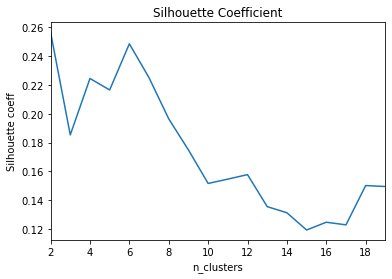

In [100]:
n_clusters, s_list = optimum_clusters(ks_matrix_tsc, max_clusters = 20, method = "ss", linkage = "average")

In [101]:
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( ks_matrix_tsc )
print(labels)
ks_clusters_tsc = pd.DataFrame(index = np.arange(len(ks_edges_tsc)),columns = ["edge_id", "cluster_id"])
ks_clusters_tsc["edge_id"] = ks_edges_tsc
ks_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[3 1 2 2 2 2 2 5 1 2 2 1 1 4 1 4 1 1 2 1 2 2 2 1 2 0 2 2 2 2 2 3 3 0 3 2 0
 1 0 3 0 0 2 0 2 1 2 2 0 0 2 2 1 2 0 1 1 4 4 4 0 3 0 4 1 0 0 2 4 0 0 2 4 4
 2 0 0 1 2 1 1 4 2 1 1 1 0 3 2 1 1 3 2 4 4 0 2 2 2 2 2 2 2 2 4 3 2 1 1 4 2
 1 1 1 0 2 2 0 1 1 5 2 2 0 1 2 1 1 1 1 1 1 2 3 3 0 0 1 1 1 2 2 1 2 1 2 0 2
 0 2 2 1 1 0 2 2 1 0 1 0 2 1 2 2 2 2 0 1 0 2 0 0 1 2 0 1 1 1 2 1 1 3 3 0 2
 2 2 4 2 3 0 1 2 2 2 2]
6 clusters


no. of edges: 249
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
Edges without enough data are black


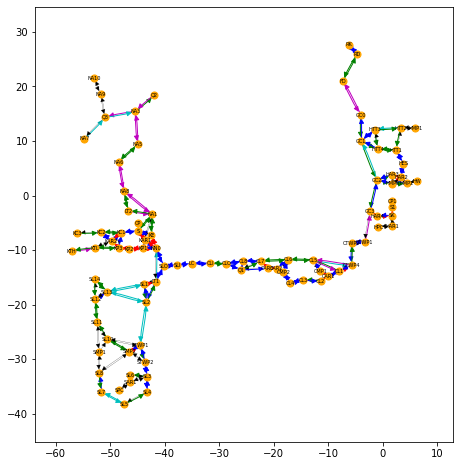

In [11]:
G = draw_clusters_tsc("tsc_map.yaml", ks_clusters_tsc, size = 2, rotate = False)
plt.savefig("clusters_ks_tsc.png", dpi = 1000, bbox_inches = "tight")

## 5b) Binary classifier

In [102]:
#Load data
#training map
df_class_diff_aaf = dataloader6(ks_clusters_aaf, filename = "aaf_map.yaml")
#testing map
df_class_diff_tsc = dataloader6(ks_clusters_tsc, filename = "tsc_map.yaml")


Time taken (dataloader6): 17.638619661331177 secs
Time taken (dataloader6): 22.806766510009766 secs


In [298]:
#point test - can choose classifier
clf_tsc = classifier_pointtest(df_class_diff_aaf, df_class_diff_tsc,classifier = "gb",balanced = True)

Samples drawn: 6220
Samples drawn: 9952
Classifier type: gb
Accuracy: 0.7123191318327974
              precision    recall  f1-score   support

         0.0       0.76      0.62      0.68      4976
         1.0       0.68      0.80      0.74      4976

    accuracy                           0.71      9952
   macro avg       0.72      0.71      0.71      9952
weighted avg       0.72      0.71      0.71      9952



Samples drawn: 19110
edge_length_diff           0.434193
sum_angle_diff             0.240566
max_angle_diff             0.237456
total_connections_diff     0.035713
origin_connections_diff    0.027453
target_connections_diff    0.024620
dtype: float64


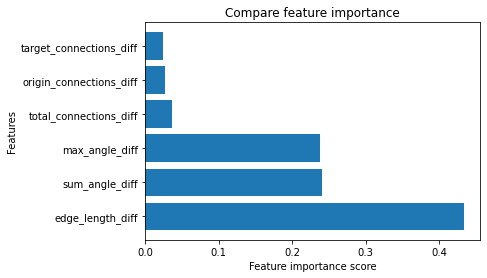

In [225]:
#feature importance (assumes an rf classifier)
importance = classifier_featureimportance(df_class_diff_tsc, balanced = False)

## 5c) Classifier to clusters

In [299]:
dist_matrix_tsc, dist_edges_tsc = distances_class(df_class_diff_tsc,clf_tsc)

0 iterations: 0.022387027740478516 secs
5000 iterations: 18.797049283981323 secs
10000 iterations: 37.39595437049866 secs
15000 iterations: 56.12915563583374 secs
Time taken (distances_class): 71.48847365379333 secs


Optimum no. of clusters: 8
Max CH index: 313.29998369262194


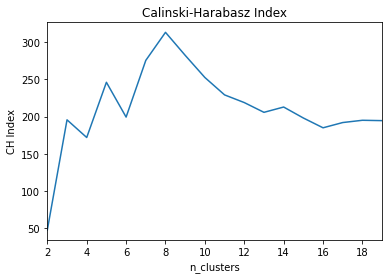

In [308]:
n_clusters, s_list = optimum_clusters(dist_matrix_tsc, max_clusters = 20, method = "ch", linkage = "average")

In [314]:
clustering = AgglomerativeClustering(n_clusters=8, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( dist_matrix_tsc )
print(labels)
dist_clusters_tsc = pd.DataFrame(index = np.arange(len(dist_edges_tsc)),columns = ["edge_id", "cluster_id"])
dist_clusters_tsc["edge_id"] = dist_edges_tsc
dist_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[3 6 6 0 0 6 0 4 3 6 0 3 6 5 3 1 1 6 0 2 2 6 6 3 6 0 6 1 0 6 6 3 7 4 5 6 4
 2 4 7 0 0 4 0 6 2 6 0 0 4 0 0 2 0 4 3 3 1 1 1 4 7 0 1 3 0 4 0 5 4 4 3 5 5
 6 4 0 6 6 2 2 3 0 1 1 6 0 7 2 3 2 1 0 5 3 4 6 0 0 0 0 0 0 6 1 1 0 6 6 3 0
 2 3 6 0 0 0 4 6 2 4 6 0 4 6 0 6 3 2 3 6 2 0 3 5 4 0 6 2 2 6 0 6 4 2 0 4 0
 0 0 6 6 6 4 0 6 6 0 7 4 4 2 0 0 3 6 0 6 4 0 4 0 2 0 4 3 3 6 6 4 0 1 5 0 0
 4 4 2 0 7 4 2 6 4 0]
8 clusters


no. of edges: 249
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
CLuster 6 has colour code: orange
CLuster 7 has colour code: purple
Edges without enough data are black


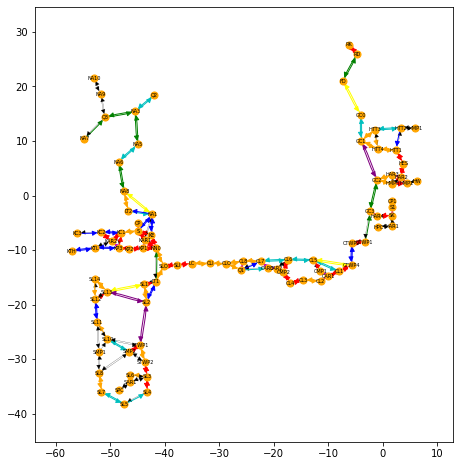

In [315]:
G = draw_clusters_tsc("tsc_map.yaml", dist_clusters_tsc, size = 2, rotate = False)
plt.savefig("clusters_dist_tsc.png", dpi = 1000, bbox_inches = "tight")

## 5d) Comparison 1 - Edge length clusters

In [233]:
context_tsc = get_context("tsc_map.yaml",suppress_message = False)
length_matrix_tsc,length_edges_tsc = distances_length_subset(context_tsc,dist_edges_tsc)

Time taken (get_context): 0.7311320304870605 secs
Time taken (distances_length_subset):  2.0361995697021484 secs


Optimum no. of clusters: 19
Max silhouette coeff: 0.6364148943379301


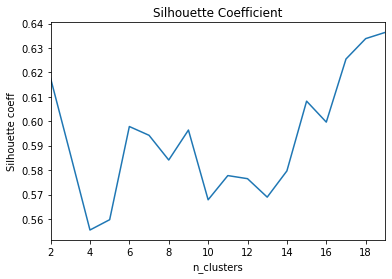

In [234]:
n_clusters, s_list = optimum_clusters(length_matrix_tsc, max_clusters = 20, method = "ss", linkage = "average")

In [235]:
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( length_matrix_tsc )
print(labels)
length_clusters_tsc = pd.DataFrame(index = np.arange(len(length_edges_tsc)),columns = ["edge_id", "cluster_id"])
length_clusters_tsc["edge_id"] = length_edges_tsc
length_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[3 4 3 3 3 3 3 3 4 5 5 4 4 4 2 4 5 3 5 4 4 4 0 2 1 1 2 4 2 5 3 5 5 3 4 3 4
 3 4 2 4 4 1 1 4 0 2 0 1 0 0 5 5 1 4 2 0 4 2 3 4 3 4 4 3 3 4 4 4 4 3 4 4 4
 5 1 1 1 5 5 5 5 3 3 4 4 3 4 4 1 5 4 1 4 1 4 3 1 4 3 4 4 4 4 4 1 3 4 1 1 1
 5 1 2 1 5 5 4 1 1 0 1 2 1 2 2 1 1 2 2 0 2 5 5 4 4 4 1 4 1 3 1 2 4 2 4 4 3
 5 3 4 4 1 3 3 3 4 4 4 5 5 5 0 4 1 5 1 1 4 0 0 5 5 5 0 5 0 1 4 5 4 4 1 1 3
 1 5 5 4 1 0 4 5 4 5]
6 clusters


no. of edges: 249
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
Edges without enough data are black


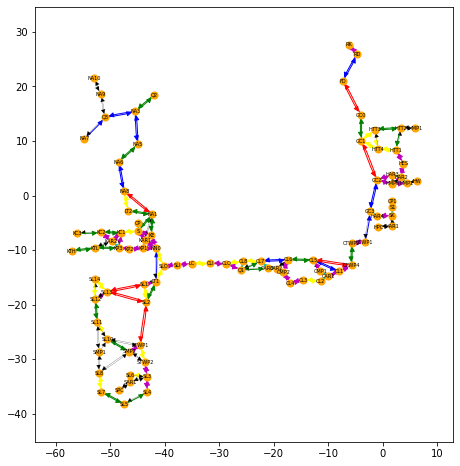

In [25]:
G = draw_clusters_tsc("tsc_map.yaml", length_clusters_tsc, size = 2, rotate = False)
plt.savefig("clusters_length_tsc.png", dpi = 1000, bbox_inches = "tight")

## 5e) Comparison 2 - KS clusters
- See section 5b

no. of edges: 249
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
Edges without enough data are black


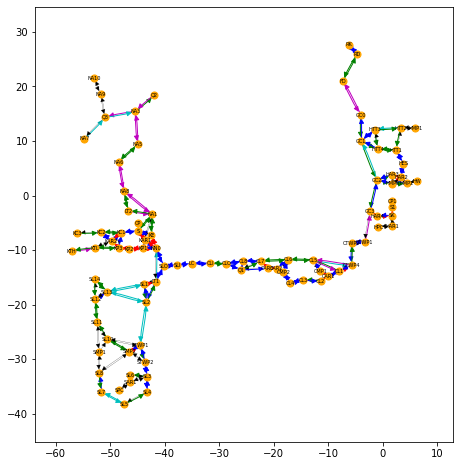

In [67]:
G = draw_clusters_tsc("tsc_map.yaml", ks_clusters_tsc, size = 2, rotate = False)
plt.savefig("clusters_ks_tsc.png", dpi = 1000, bbox_inches = "tight")

# 6) Evaluate Performance on TSC

## 6a) Single edge per cluster with max data
- binary classification clusters
- edge length clusters
- ks clusters

In [177]:
ks_df = evaluate_maxedge(df_tsc_merge, dist_clusters_tsc, metric = "difference", n_fitted = 0)
ks_df.head(6)

cluster 0 ( 20 edges ): 0.14315509796142578 secs
cluster 1 ( 12 edges ): 0.18703651428222656 secs
cluster 2 ( 42 edges ): 0.23133516311645508 secs
cluster 3 ( 1 edges ): 0.3141133785247803 secs
cluster 4 ( 50 edges ): 0.31610822677612305 secs
cluster 5 ( 70 edges ): 0.46920347213745117 secs
n_fitted: 0
Time taken: 0.6437363624572754 secs
Mean KS: 0.4907030521918561


,cluster_id,n_edges,ks_mean,ks_median,ks_max,ks_min
0,0,20,0.579017,0.604257,0.914286,0.307936
1,1,12,0.566952,0.558645,0.732361,0.472396
2,2,42,0.606641,0.59909,0.988095,0.129202
3,3,1,NaN,NaN,NaN,NaN
4,4,50,0.447471,0.444969,0.707756,0.229272
5,5,70,0.41604,0.404587,0.936494,0.0832837


In [178]:
ks_df = evaluate_maxedge(df_tsc_merge, length_clusters_tsc, metric = "difference", n_fitted = 0)
ks_df.head(6)

cluster 0 ( 14 edges ): 0.1461622714996338 secs
cluster 1 ( 37 edges ): 0.1768932342529297 secs
cluster 2 ( 17 edges ): 0.3215062618255615 secs
cluster 3 ( 30 edges ): 0.36139965057373047 secs
cluster 4 ( 63 edges ): 0.4342048168182373 secs
cluster 5 ( 34 edges ): 0.5937778949737549 secs
n_fitted: 0
Time taken: 0.6955070495605469 secs
Mean KS: 0.6984865611450315


,cluster_id,n_edges,ks_mean,ks_median,ks_max,ks_min
0,0,14,0.793463,0.813023,0.912621,0.620812
1,1,37,0.753731,0.84171,1,0.275185
2,2,17,0.718694,0.774725,0.835165,0.408381
3,3,30,0.950792,0.988235,1,0.246032
4,4,63,0.59238,0.610079,0.921933,0.0749519
5,5,34,0.568638,0.54263,0.847962,0.309099


In [190]:
ks_df = evaluate_maxedge(df_tsc_merge, ks_clusters_tsc, metric = "difference", n_fitted = 0)
ks_df.head(6)

cluster 0 ( 37 edges ): 0.1426558494567871 secs
cluster 1 ( 55 edges ): 0.21724247932434082 secs
cluster 2 ( 73 edges ): 0.3828005790710449 secs
cluster 3 ( 14 edges ): 0.5653111934661865 secs
cluster 4 ( 15 edges ): 0.6221592426300049 secs
cluster 5 ( 2 edges ): 0.6560683250427246 secs
n_fitted: 0
Time taken: 0.6610550880432129 secs
Mean KS: 0.46231125427616004


,cluster_id,n_edges,ks_mean,ks_median,ks_max,ks_min
0,0,37,0.579879,0.564636,0.949104,0.129202
1,1,55,0.443591,0.439999,0.707756,0.229272
2,2,73,0.392352,0.38429,0.693293,0.0832837
3,3,14,0.513665,0.557769,0.732361,0.275185
4,4,15,0.559756,0.560937,0.813023,0.307936
5,5,2,0.246032,0.246032,0.246032,0.246032


## 6b) Single edge per cluster (faster implementation)

In [169]:
fit_tsc = get_lognorm_fit(df_tsc_merge,filename = "tsc_map.yaml",metric = "difference")
fit_tsc = fit_tsc.sort_values("n_obs", ascending = False).reset_index(drop = True)
fit_tsc.head(2)

0 edges: 0.5764832496643066 secs
20 edges: 5.864173650741577 secs
40 edges: 11.064818859100342 secs
60 edges: 19.575201988220215 secs
80 edges: 24.11346197128296 secs
100 edges: 27.291680574417114 secs
120 edges: 31.693864345550537 secs
140 edges: 35.91474795341492 secs
160 edges: 42.000526905059814 secs
180 edges: 46.848803997039795 secs
200 edges: 61.3895046710968 secs
220 edges: 69.50848579406738 secs
240 edges: 73.33678817749023 secs
Time taken (get_lognorm_fit): 74.60739755630493 secs


,edge_id,origin,target,n_obs,s,loc,scale
247,SuppTransWP2_SuppTransWP1,SuppTransWP2,SuppTransWP1,40,0.1,3.60307,2.22554
248,SuppTransWP2_SuppMeetingPod2,SuppTransWP2,SuppMeetingPod2,12,1.90526,6.73,2.01375


In [194]:
ks_df = evaluate_maxedge_fast(df_tsc_merge, dist_clusters_tsc, fit_tsc,metric = "difference", n_fitted = 0)
ks_df.head(6)

cluster 0 ( 20 edges ): 0.14763665199279785 secs
cluster 1 ( 12 edges ): 0.19190049171447754 secs
cluster 2 ( 42 edges ): 0.23678040504455566 secs
cluster 3 ( 1 edges ): 0.31955909729003906 secs
cluster 4 ( 50 edges ): 0.32155370712280273 secs
cluster 5 ( 70 edges ): 0.4731478691101074 secs
n_fitted: 0
Time taken: 0.6785988807678223 secs
Mean KS: 0.4907030521918561


,cluster_id,n_edges,ks_mean,ks_median,ks_max,ks_min
0,0,20,0.579017,0.604257,0.914286,0.307936
1,1,12,0.566952,0.558645,0.732361,0.472396
2,2,42,0.606641,0.59909,0.988095,0.129202
3,3,1,NaN,NaN,NaN,NaN
4,4,50,0.447471,0.444969,0.707756,0.229272
5,5,70,0.41604,0.404587,0.936494,0.0832837


In [195]:
ks_df = evaluate_maxedge_fast(df_tsc_merge, length_clusters_tsc, fit_tsc,metric = "difference", n_fitted = 0)
ks_df.head(6)

cluster 0 ( 14 edges ): 0.15113306045532227 secs
cluster 1 ( 37 edges ): 0.1850118637084961 secs
cluster 2 ( 17 edges ): 0.33264708518981934 secs
cluster 3 ( 30 edges ): 0.3740718364715576 secs
cluster 4 ( 63 edges ): 0.4458794593811035 secs
cluster 5 ( 34 edges ): 0.6194183826446533 secs
n_fitted: 0
Time taken: 0.7450792789459229 secs
Mean KS: 0.6984865611450315


,cluster_id,n_edges,ks_mean,ks_median,ks_max,ks_min
0,0,14,0.793463,0.813023,0.912621,0.620812
1,1,37,0.753731,0.84171,1,0.275185
2,2,17,0.718694,0.774725,0.835165,0.408381
3,3,30,0.950792,0.988235,1,0.246032
4,4,63,0.59238,0.610079,0.921933,0.0749519
5,5,34,0.568638,0.54263,0.847962,0.309099


In [196]:
ks_df = evaluate_maxedge_fast(df_tsc_merge, ks_clusters_tsc, fit_tsc,metric = "difference", n_fitted = 0)
ks_df.head(6)

cluster 0 ( 37 edges ): 0.14315485954284668 secs
cluster 1 ( 55 edges ): 0.2167658805847168 secs
cluster 2 ( 73 edges ): 0.38431739807128906 secs
cluster 3 ( 14 edges ): 0.5668294429779053 secs
cluster 4 ( 15 edges ): 0.6216821670532227 secs
cluster 5 ( 2 edges ): 0.6545941829681396 secs
n_fitted: 0
Time taken: 0.6595809459686279 secs
Mean KS: 0.46231125427616004


,cluster_id,n_edges,ks_mean,ks_median,ks_max,ks_min
0,0,37,0.579879,0.564636,0.949104,0.129202
1,1,55,0.443591,0.439999,0.707756,0.229272
2,2,73,0.392352,0.38429,0.693293,0.0832837
3,3,14,0.513665,0.557769,0.732361,0.275185
4,4,15,0.559756,0.560937,0.813023,0.307936
5,5,2,0.246032,0.246032,0.246032,0.246032


## 6c) All edges against all edges

In [ ]:
fit_tsc = get_lognorm_fit(df_tsc_merge,filename = "tsc_map.yaml",metric = "difference")
fit_tsc = fit_tsc.sort_values("n_obs", ascending = False).reset_index(drop = True)
fit_tsc.head(2)

In [324]:
ks_df = evaluate_alledge(df_tsc_merge, dist_clusters_tsc, fit_tsc,metric = "difference", n_fitted = 2)
ks_df.head(6)

cluster 0 ( 55 edges ): 0.1491379737854004 secs
cluster 1 ( 13 edges ): 4.670308589935303 secs
cluster 2 ( 20 edges ): 4.875789403915405 secs
cluster 3 ( 21 edges ): 5.938779830932617 secs
cluster 4 ( 30 edges ): 6.522820472717285 secs
cluster 5 ( 8 edges ): 7.692850112915039 secs
cluster 6 ( 42 edges ): 7.781586408615112 secs
cluster 7 ( 6 edges ): 10.123761892318726 secs
n_fitted: 2
Time taken: 10.164652824401855 secs
Mean KS: 0.2803108542935373


,cluster_id,n_edges,ks_mean,ks_median,ks_max,ks_min
0,0,55,0.261528,0.23788,0.996769,0
1,1,13,0.412315,0.380764,0.999505,0
2,2,20,0.24668,0.229345,0.692391,0
3,3,21,0.305072,0.205017,1,0
4,4,30,0.268839,0.205604,1,0
5,5,8,0.449447,0.505254,0.962601,0


In [325]:
ks_df = evaluate_alledge(df_tsc_merge, length_clusters_tsc, fit_tsc,metric = "difference", n_fitted = 2)
ks_df.head(6)

cluster 0 ( 14 edges ): 0.14763689041137695 secs
cluster 1 ( 37 edges ): 0.3889591693878174 secs
cluster 2 ( 17 edges ): 3.1262121200561523 secs
cluster 3 ( 30 edges ): 3.4678990840911865 secs
cluster 4 ( 63 edges ): 4.595886945724487 secs
cluster 5 ( 34 edges ): 10.170251846313477 secs
n_fitted: 2
Time taken: 11.797403335571289 secs
Mean KS: 0.28174488899249145


,cluster_id,n_edges,ks_mean,ks_median,ks_max,ks_min
0,0,14,0.417856,0.367763,1,0
1,1,37,0.263769,0.186294,1,0
2,2,17,0.404831,0.397695,0.999505,0
3,3,30,0.269228,0.205604,1,0
4,4,63,0.269832,0.234972,1,0
5,5,34,0.302345,0.272321,1,0


In [202]:
ks_df = evaluate_alledge(df_tsc_merge, ks_clusters_tsc, fit_tsc,metric = "difference", n_fitted = 2)
ks_df.head(6)

cluster 0 ( 37 edges ): 0.14165902137756348 secs
cluster 1 ( 55 edges ): 1.8227622509002686 secs
cluster 2 ( 73 edges ): 7.329267978668213 secs
cluster 3 ( 14 edges ): 14.726407527923584 secs
cluster 4 ( 15 edges ): 14.987350702285767 secs
cluster 5 ( 2 edges ): 15.23868179321289 secs
n_fitted: 2
Time taken: 15.246655225753784 secs
Mean KS: 0.23941018602576994


,cluster_id,n_edges,ks_mean,ks_median,ks_max,ks_min
0,0,37,0.244987,0.200561,0.999991,0
1,1,55,0.270874,0.217825,1,0
2,2,73,0.217134,0.162159,1,0
3,3,14,0.347531,0.289108,1,0
4,4,15,0.223802,0.175062,0.997081,0
5,5,2,0.142811,0.142811,0.142811,0.142811


## 6d) Class 1 & Class 2 KS scores

In [220]:
#Load data
#training map
df_class_diff_aaf = dataloader6(ks_clusters_aaf, filename = "aaf_map.yaml")
#testing map
df_class_diff_tsc = dataloader6(ks_clusters_tsc, filename = "tsc_map.yaml")


Time taken (dataloader6): 20.522964000701904 secs
Time taken (dataloader6): 24.759674072265625 secs


In [319]:
#point test - can choose classifier
clf_tsc = classifier_pointtest(df_class_diff_aaf, df_class_diff_tsc,classifier = "gb",balanced = True)

Samples drawn: 6220
Samples drawn: 9952
Classifier type: gb
Accuracy: 0.7123191318327974
              precision    recall  f1-score   support

         0.0       0.76      0.62      0.68      4976
         1.0       0.68      0.80      0.74      4976

    accuracy                           0.71      9952
   macro avg       0.72      0.71      0.71      9952
weighted avg       0.72      0.71      0.71      9952



# 7) Evaluate performance on AAF

In [205]:
fit_aaf = get_lognorm_fit(df_aaf_merge,filename = "aaf_map.yaml",metric = "difference")
fit_aaf = fit_aaf.sort_values("n_obs", ascending = False).reset_index(drop = True)
fit_aaf.head(2)

0 edges: 0.5870015621185303 secs
20 edges: 8.811036586761475 secs
40 edges: 22.775381565093994 secs
60 edges: 29.122422218322754 secs
80 edges: 34.042946100234985 secs
100 edges: 48.8917715549469 secs
120 edges: 55.0688898563385 secs
140 edges: 60.65908479690552 secs
160 edges: 62.17377805709839 secs
180 edges: 72.95982360839844 secs
200 edges: 75.85060095787048 secs
Time taken (get_lognorm_fit): 78.52166032791138 secs


,edge_id,origin,target,n_obs,s,loc,scale
0,WayPoint86_WayPoint90,WayPoint86,WayPoint90,1148,0.173205,3.99458,3.63279
1,WayPoint87_WayPoint89,WayPoint87,WayPoint89,981,0.2,2.6345,2.36316


In [217]:
ks_df = evaluate_alledge(df_aaf_merge, dist_clusters_aaf, fit_aaf,metric = "difference", n_fitted = 2)
ks_df.head(6)

cluster 0 ( 2 edges ): 0.23279833793640137 secs
cluster 1 ( 98 edges ): 0.241804838180542 secs
cluster 2 ( 15 edges ): 18.80876398086548 secs
cluster 3 ( 59 edges ): 19.197723865509033 secs
n_fitted: 2
Time taken: 24.42395853996277 secs
Mean KS: 0.37759883245532444


,cluster_id,n_edges,ks_mean,ks_median,ks_max,ks_min
0,0,2,0.296966,0.296966,0.296966,0.296966
1,1,98,0.348618,0.276136,1,0
2,2,15,0.418957,0.295055,1,0
3,3,59,0.455613,0.412956,1,0


In [218]:
ks_df = evaluate_alledge(df_aaf_merge, length_clusters_aaf, fit_aaf,metric = "difference", n_fitted = 2)
ks_df.head(6)

cluster 0 ( 15 edges ): 0.22902560234069824 secs
cluster 1 ( 57 edges ): 0.6988942623138428 secs
cluster 2 ( 2 edges ): 6.2751524448394775 secs
cluster 3 ( 100 edges ): 6.282102346420288 secs
n_fitted: 2
Time taken: 25.85416293144226 secs
Mean KS: 0.3850166344423302


,cluster_id,n_edges,ks_mean,ks_median,ks_max,ks_min
0,0,15,0.418957,0.295055,1,0
1,1,57,0.49586,0.477584,1,0
2,2,2,0.296966,0.296966,0.296966,0.296966
3,3,100,0.348576,0.278023,1,0


In [219]:
ks_df = evaluate_alledge(df_aaf_merge, ks_clusters_aaf, fit_aaf,metric = "difference", n_fitted = 2)
ks_df.head(6)

cluster 0 ( 7 edges ): 0.23141193389892578 secs
cluster 1 ( 26 edges ): 0.35508155822753906 secs
cluster 2 ( 61 edges ): 1.4741170406341553 secs
cluster 3 ( 30 edges ): 8.66174054145813 secs
cluster 4 ( 7 edges ): 10.539430379867554 secs
cluster 5 ( 18 edges ): 10.63517427444458 secs
cluster 6 ( 26 edges ): 11.19927191734314 secs
n_fitted: 2
Time taken: 12.483234405517578 secs
Mean KS: 0.3190550486899019


,cluster_id,n_edges,ks_mean,ks_median,ks_max,ks_min
0,0,7,0.193039,0.133895,0.807809,0
1,1,26,0.345535,0.316672,0.98729,0
2,2,61,0.305726,0.259826,1,0
3,3,30,0.349686,0.335312,0.999128,0
4,4,7,0.513582,0.526737,0.981203,0
5,5,18,0.308096,0.272524,0.999721,0
